In [44]:
import pandas as pd
import glob
import json
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Assemble dataset

In [52]:
results = []

for filename in glob.glob('../location_data/data/*.json'):
    ## print(filename)
    with open(filename) as fp:
        data = json.load(fp)

    results.extend(data['summary'])

df = pd.DataFrame(results).sort_values('query_time')
df['query_time'] = pd.to_datetime(df['query_time'])

In [53]:
df.head()

,geo_state,geo_city,num_addresses,num_in_stock,percent_in_stock,percent_had_stock_last_24h,out_of_stock_time_mins_median,out_of_stock_time_mins_prc25,out_of_stock_time_mins_prc75,num_out_of_stock_time_samples,query_time
7736,SA,Other,11,3,27.272727,27.272727,NaN,NaN,NaN,0,2022-01-15 13:21:23.474088
7728,ACT,Canberra,72,1,1.388889,9.722222,38.0,29.0,104.0,11,2022-01-15 13:21:23.474088
7729,NSW,Canberra,9,0,0.000000,22.222222,89.0,86.0,109.0,5,2022-01-15 13:21:23.474088
7730,NSW,Other,214,56,26.168224,29.439252,157.0,70.0,520.0,19,2022-01-15 13:21:23.474088
7731,NSW,Sydney,416,130,31.250000,38.461538,109.0,30.0,221.0,96,2022-01-15 13:21:23.474088


In [54]:
df_metro = df[df['geo_city'] != 'Other'].copy()
df_metro

,geo_state,geo_city,num_addresses,num_in_stock,percent_in_stock,percent_had_stock_last_24h,out_of_stock_time_mins_median,out_of_stock_time_mins_prc25,out_of_stock_time_mins_prc75,num_out_of_stock_time_samples,query_time
7728,ACT,Canberra,72,1,1.388889,9.722222,38.0,29.0,104.0,11,2022-01-15 13:21:23.474088
7729,NSW,Canberra,9,0,0.000000,22.222222,89.0,86.0,109.0,5,2022-01-15 13:21:23.474088
7731,NSW,Sydney,416,130,31.250000,38.461538,109.0,30.0,221.0,96,2022-01-15 13:21:23.474088
7733,QLD,Brisbane,139,6,4.316547,7.913669,19.0,12.0,54.0,24,2022-01-15 13:21:23.474088
7735,SA,Adelaide,82,7,8.536585,15.853659,83.0,35.0,173.0,28,2022-01-15 13:21:23.474088
...,...,...,...,...,...,...,...,...,...,...,...
15347,QLD,Brisbane,45,45,100.000000,100.000000,NaN,NaN,NaN,0,2022-03-05 00:21:27.320096
15345,NSW,Sydney,64,64,100.000000,100.000000,NaN,NaN,NaN,0,2022-03-05 00:21:27.320096
15343,ACT,Canberra,5,5,100.000000,100.000000,NaN,NaN,NaN,0,2022-03-05 00:21:27.320096
15356,WA,Perth,22,21,95.454545,95.454545,NaN,NaN,NaN,0,2022-03-05 00:21:27.320096


In [55]:
## It appears some city/state combinations are not correct
df_metro.groupby(['geo_state', 'geo_city']).agg({
    'num_addresses': 'mean'
})

num_addresses
geo_state geo_city                
ACT       Canberra       28.944923
NSW       Canberra        2.738570
          Sydney        210.946644
QLD       Brisbane       98.158348
SA        Adelaide      141.190189
          Sydney          1.000000
TAS       Hobart          4.220017
VIC       Melbourne     189.755594
WA        Perth          20.943201

In [56]:
def validate_city_state(row):
    if row.geo_state == 'NSW' and row.geo_city == 'Sydney':
        return True
    if row.geo_state == 'VIC' and row.geo_city == 'Melbourne':
        return True
    if row.geo_state == 'SA' and row.geo_city == 'Adelaide':
        return True
    if row.geo_state == 'TAS' and row.geo_city == 'Hobart':
        return True
    if row.geo_state == 'QLD' and row.geo_city == 'Brisbane':
        return True
    if row.geo_state == 'WA' and row.geo_city == 'Perth':
        return True
    if row.geo_state == 'ACT' and row.geo_city == 'Canberra':
        return True
    return False

df_metro['valid'] = df_metro.apply(validate_city_state, axis=1)

In [57]:
df_metro_filtered = df_metro[df_metro['valid']]
df_metro_filtered.groupby(['geo_state', 'geo_city']).agg({
    'num_addresses': 'mean'
})

,,num_addresses
geo_state,geo_city,
ACT,Canberra,28.944923
NSW,Sydney,210.946644
QLD,Brisbane,98.158348
SA,Adelaide,141.190189
TAS,Hobart,4.220017
VIC,Melbourne,189.755594
WA,Perth,20.943201


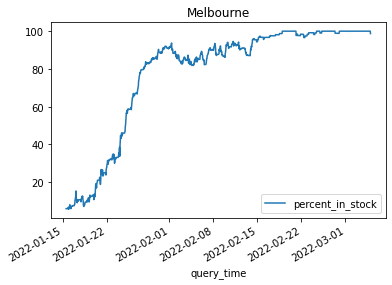

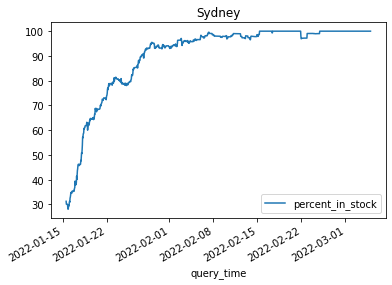

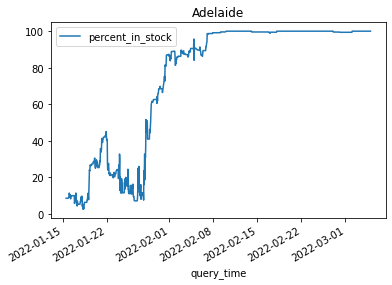

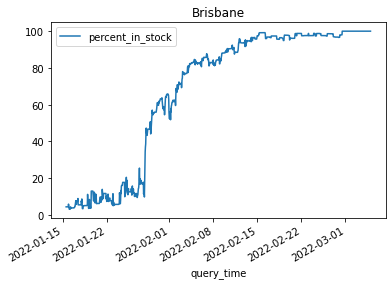

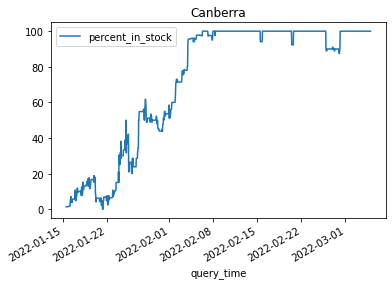

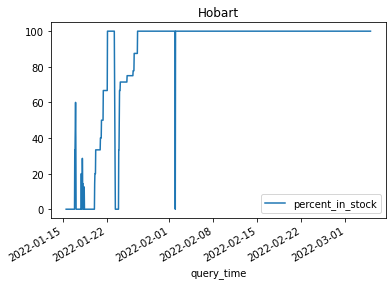

In [58]:
for city in ['Melbourne', 'Sydney', 'Adelaide', 'Brisbane', 'Canberra', 'Hobart']:
    df_metro_filtered[df_metro_filtered['geo_city'] == city].plot('query_time', 'percent_in_stock')
    plt.title(city)
    plt.show()


In [59]:
type(df_metro_filtered['query_time'][0])

pandas._libs.tslibs.timestamps.Timestamp

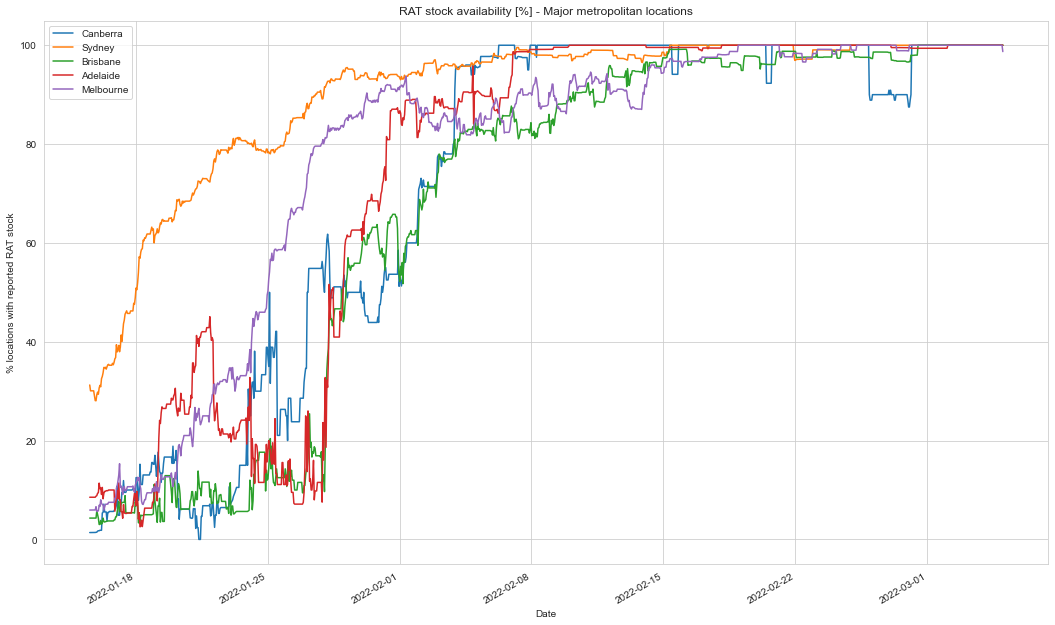

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(18, 10))

sns.set_style('whitegrid')

g = sns.lineplot(data=df_metro_filtered[df_metro_filtered['geo_city'].isin(['Sydney', 'Melbourne', 'Adelaide', 'Brisbane', 'Canberra'])], 
             x='query_time', 
             y='percent_in_stock', 
             hue='geo_city')

ax.set_title('RAT stock availability [%] - Major metropolitan locations')
ax.set_ylabel('% locations with reported RAT stock')
ax.set_xlabel('Date')
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_minor_locator(mdates.WeekdayLocator())

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

ax.grid(True)
g.get_legend().set_title(None)